In [1]:
import dask
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from remake import load_remake

from mcs_prime import PATHS

In [2]:
# Data pre-computed using SLURM. Taking ideas from Experimental below.

era5_hists = load_remake('../../remakefiles/era5_histograms.py')


In [9]:
cape_paths = [p for p in [t.outputs['hist'] for t in era5_hists.ConditionalERA5Hist.tasks.filter(var='cape')] if p.exists()]
tcwv_paths = [p for p in [t.outputs['hist'] for t in era5_hists.ConditionalERA5Hist.tasks.filter(var='tcwv')] if p.exists()]

In [10]:
ds_cape = xr.open_mfdataset(cape_paths)
ds_tcwv = xr.open_mfdataset(tcwv_paths)

In [11]:
ds_cape

<xarray.Dataset>
Dimensions:            (time: 8766, hist_mid: 500, bins: 501)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-12-...
  * hist_mid           (hist_mid) float64 5.0 15.0 25.0 ... 4.985e+03 4.995e+03
  * bins               (bins) float64 0.0 10.0 20.0 ... 4.98e+03 4.99e+03 5e+03
Data variables:
    cape_MCS_shield    (time, hist_mid) float64 dask.array<chunksize=(24, 500), meta=np.ndarray>
    cape_MCS_core      (time, hist_mid) float64 dask.array<chunksize=(24, 500), meta=np.ndarray>
    cape_cloud_shield  (time, hist_mid) float64 dask.array<chunksize=(24, 500), meta=np.ndarray>
    cape_cloud_core    (time, hist_mid) float64 dask.array<chunksize=(24, 500), meta=np.ndarray>
    cape_env           (time, hist_mid) float64 dask.array<chunksize=(24, 500), meta=np.ndarray>

In [12]:
ds_cape.cape_MCS_shield.load()
ds_cape.cape_MCS_core.load()
ds_cape.cape_cloud_shield.load()
ds_cape.cape_cloud_core.load()
ds_cape.cape_env.load()

<xarray.DataArray 'cape_env' (time: 8766, hist_mid: 500)>
array([[3.95936e+05, 5.28280e+04, 2.78100e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.91551e+05, 5.37410e+04, 2.89760e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.86516e+05, 5.56150e+04, 2.95170e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.93618e+05, 5.76000e+04, 2.80190e+04, ..., 2.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.12444e+05, 5.19390e+04, 2.60400e+04, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * time      (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-12-31T23:30:00
  * hist_mid  (hist_mid) float64 5.0 15.0 25.0 ... 4.975e+03 4.985e+03 4.995e+03

In [13]:
ds_tcwv.tcwv_MCS_shield.load()
ds_tcwv.tcwv_MCS_core.load()
ds_tcwv.tcwv_cloud_shield.load()
ds_tcwv.tcwv_cloud_core.load()
ds_tcwv.tcwv_env.load()

<xarray.DataArray 'tcwv_env' (time: 8766, hist_mid: 100)>
array([[ 1636.,  9213., 11030., ...,     0.,     0.,     0.],
       [ 1758.,  9078., 11243., ...,     0.,     0.,     0.],
       [ 1883.,  8913., 11208., ...,     0.,     0.,     0.],
       ...,
       [ 5133., 16457., 13130., ...,     0.,     0.,     0.],
       [ 5053., 16584., 13043., ...,     0.,     0.,     0.],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])
Coordinates:
  * time      (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-12-31T23:30:00
  * hist_mid  (hist_mid) float64 0.5 1.5 2.5 3.5 4.5 ... 96.5 97.5 98.5 99.5

In [22]:
def plot_hist(ds, v='cape', s=None, log=True):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
    plt.figure(figsize=(10, 10))
    def _plot_hist(ds, h, title):
        bins = ds.bins.values
        width = bins[1] - bins[0]
        h_density = h / (h.sum() * width)
        plt.plot(ds.hist_mid.values[s], h_density[s], label=title);

    plt.title(f'{v.upper()} distributions')
    _plot_hist(ds, np.nansum(ds[f'{v}_MCS_shield'].values, axis=0), 'MCS shield')
    _plot_hist(ds, np.nansum(ds[f'{v}_MCS_core'].values, axis=0), 'MCS core')
    _plot_hist(ds, np.nansum(ds[f'{v}_cloud_shield'].values, axis=0), 'cloud shield')
    _plot_hist(ds, np.nansum(ds[f'{v}_cloud_core'].values, axis=0), 'cloud core')
    _plot_hist(ds, np.nansum(ds[f'{v}_env'].values, axis=0), 'env')
    plt.legend()
    if log:
        plt.yscale('log')
    if v == 'cape':
        plt.xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        plt.xlabel('TCWV (mm)')
        

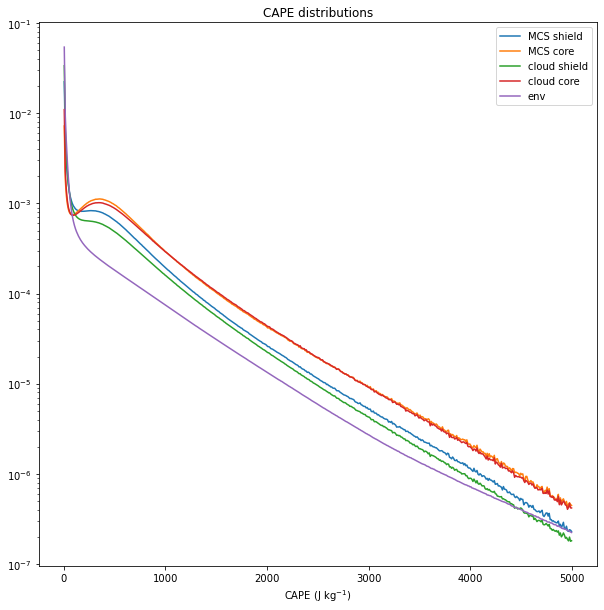

In [23]:
plot_hist(ds_cape)

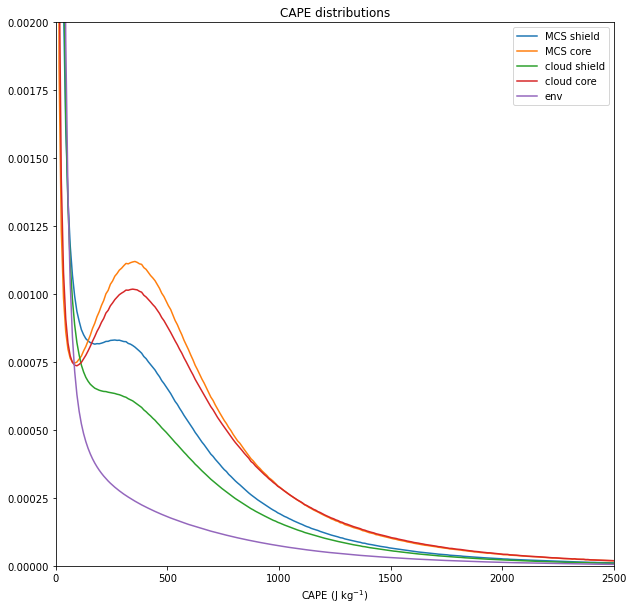

In [24]:
plot_hist(ds_cape, log=False)
plt.xlim((0, 2500))
plt.ylim((0, 0.002));

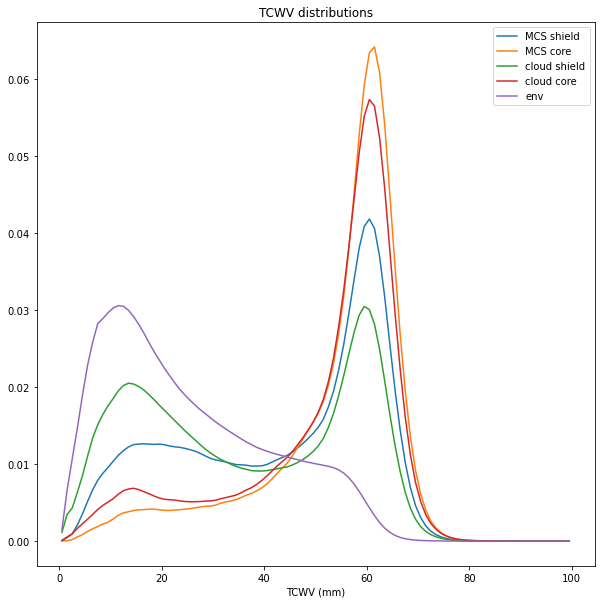

In [25]:
plot_hist(ds_tcwv, v='tcwv', log=False)